                               PERSONALIZED CANCER DIAGNOSIS!!

SOURCE:https://www.kaggle.com/c/msk-redefining-cancer-treatment

Objective: Classify the given genetic variations/mutations based on evidence from text-based clinical literature.

Business constraints:
1.errors can be costly
2.interpretability is very important
3.No low latency is required


Data Overview:
    1.training_variants (ID , Gene, Variations, Class)
    2.training_text (ID, Text)

Performance matrix:
1.multi class log-loss
2.confusion matrix

In [335]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import normalize
from math import log
from math import exp
from scipy.sparse import hstack
from sklearn.naive_bayes import MultinomialNB
warnings.filterwarnings("ignore")

In [336]:
#Reading Data(Gene and Variation!!!)
data = pd.read_csv("training_variants")
print("Number of data points:")
print(data.shape[0])
print("Number of data features:")
print(data.shape[1])
print("features:",data.columns.values)


Number of data points:
3321
Number of data features:
4
features: ['ID' 'Gene' 'Variation' 'Class']


In [337]:
#Reading Data(Text)
text_data = pd.read_csv("training_text.csv",sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
print("Number of data points:")
print(text_data.shape[0])
print("Number of data features:")
print(text_data.shape[1])
print("features:",text_data.columns.values)

Number of data points:
3321
Number of data features:
2
features: ['ID' 'TEXT']


In [338]:
text_data.head()

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [339]:
#Preprocessing:
stop_words = set(stopwords.words('english'))
def preprocess(row,text):
    if type(text) is not int:
        text_after_preprocess = ""
        remove_punctuation = re.sub('[^a-zA-Z0-9\n]',' ',text)
        remove_multispace = re.sub('\s+',' ', remove_punctuation)
        final_text = remove_multispace.lower()
    for i in final_text.split():
        if i not in stop_words:
            text_after_preprocess += i+" "
    #print (text_after_preprocess)
    text_data.iloc[[row],[1]] = text_after_preprocess
    
         
        
    


In [340]:
for index,row in text_data.iterrows():
    preprocess(index,row["TEXT"])

In [341]:
text_data.head()

,ID,TEXT
0,0,cyclin dependent kinases cdks regulate variety...
1,1,abstract background non small cell lung cancer...
2,2,abstract background non small cell lung cancer...
3,3,recent evidence demonstrated acquired uniparen...
4,4,oncogenic mutations monomeric casitas b lineag...


In [342]:
#merging the gene variation dataframe and text data frame!
final_df = pd.merge(data,text_data)
final_df.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


In [343]:
final_df["Gene"] = final_df["Gene"].str.replace("\s+","_")
final_df["Variation"] = final_df["Variation"].str.replace("\s+","_")

In [344]:
#Splitting the data frame into Train_dataFrame and Test_dataframe
Class_Y = final_df["Class"]
Train_dataFrame,Test_dataframe,Train_Y,Test_Y = train_test_split(final_df,Class_Y,stratify = Class_Y,test_size = 0.20)
#Splitting Train_dataframe into D_Train and D_Cross_Validate
D_Train,D_Cross_Validate,D_Train_Y,D_Cross_Validate_Y = train_test_split(Train_dataFrame,Train_Y,stratify = Train_Y,test_size = 0.2)


In [345]:
#No. of data points in Train Dataset,Test dataset,Cross validate Dataset
print("No. of points in Train dataset",D_Train.shape[0])
print("No. of points in Test dataset",Test_dataframe.shape[0])
print("No. of points in Cross_Validate dataset",D_Cross_Validate.shape[0])

No. of points in Train dataset 2124
No. of points in Test dataset 665
No. of points in Cross_Validate dataset 532


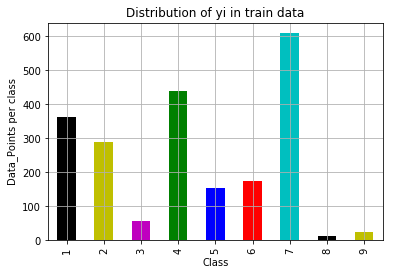

Number of data points in class 7 : 609 ( 28.6723163842% )
Number of data points in class 4 : 439 ( 20.6685499058% )
Number of data points in class 1 : 363 ( 17.0903954802% )
Number of data points in class 2 : 289 ( 13.6064030132% )
Number of data points in class 6 : 176 ( 8.28625235405% )
Number of data points in class 5 : 155 ( 7.29755178908% )
Number of data points in class 3 : 57 ( 2.68361581921% )
Number of data points in class 9 : 24 ( 1.12994350282% )
Number of data points in class 8 : 12 ( 0.564971751412% )


In [346]:
#Now lets see the distribution of class label in Train ,Test and Cross validate
Train_distribution = ((D_Train['Class'].value_counts())).sort_index()
Train_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in train data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()
#print (Train_distribution)
plt.show()
for i in Train_distribution.sort_values(ascending=False).iteritems():
    percentage = (Train_distribution.loc[i[0]]/(D_Train.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Train_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  
    

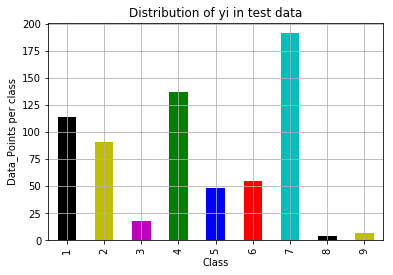

Number of data points in class 7 : 191 ( 28.7218045113% )
Number of data points in class 4 : 137 ( 20.6015037594% )
Number of data points in class 1 : 114 ( 17.1428571429% )
Number of data points in class 2 : 91 ( 13.6842105263% )
Number of data points in class 6 : 55 ( 8.27067669173% )
Number of data points in class 5 : 48 ( 7.21804511278% )
Number of data points in class 3 : 18 ( 2.70676691729% )
Number of data points in class 9 : 7 ( 1.05263157895% )
Number of data points in class 8 : 4 ( 0.601503759398% )


In [347]:
Test_distribution = ((Test_dataframe['Class'].value_counts())).sort_index()
Test_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in test data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()

plt.show()
for i in Test_distribution.sort_values(ascending=False).iteritems():
    percentage = (Test_distribution.loc[i[0]]/(Test_dataframe.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",Test_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  

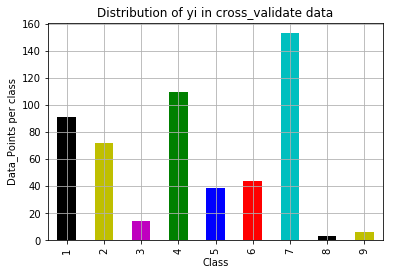

Number of data points in class 7 : 153 ( 28.7593984962% )
Number of data points in class 4 : 110 ( 20.6766917293% )
Number of data points in class 1 : 91 ( 17.1052631579% )
Number of data points in class 2 : 72 ( 13.5338345865% )
Number of data points in class 6 : 44 ( 8.27067669173% )
Number of data points in class 5 : 39 ( 7.33082706767% )
Number of data points in class 3 : 14 ( 2.63157894737% )
Number of data points in class 9 : 6 ( 1.12781954887% )
Number of data points in class 8 : 3 ( 0.563909774436% )


In [348]:
CrossValidation_distribution = ((D_Cross_Validate['Class'].value_counts())).sort_index()
CrossValidation_distribution.plot(kind = 'bar',color = 'kymgbrc')
plt.title('Distribution of yi in cross_validate data')
plt.xlabel("Class")
plt.ylabel("Data_Points per class")
plt.grid()

plt.show()
for i in CrossValidation_distribution.sort_values(ascending=False).iteritems():
    percentage = (CrossValidation_distribution.loc[i[0]]/(D_Cross_Validate.shape[0]))*100
    percent = str(percentage)+"%"
    print ("Number of data points in class",i[0],":",CrossValidation_distribution.loc[i[0]],"(",(percent),")")                                                                            
                                                                                  

Prediction using Random Model:-


In [349]:
length_test_dataset = Test_dataframe.shape[0]
length_cv_dataset = D_Cross_Validate.shape[0]
predict_y_cv = np.zeros((length_cv_dataset,9))
for i in range(length_cv_dataset):
    rand_probs = np.random.rand(1,9)
    predict_y_cv[i] = (rand_probs/sum(sum(rand_probs)))[0]
predict_y_test = np.zeros((length_test_dataset,9))
for i in range(length_test_dataset):
    rand_probs = np.random.rand(1,9)
    predict_y_test[i] = (rand_probs/sum(sum(rand_probs)))[0]

print("Log-loss on Cross validate data using random model:",log_loss(D_Cross_Validate_Y,predict_y_cv))
print("Log-loss on test data using random model:",log_loss(Test_Y,predict_y_test))



Log-loss on Cross validate data using random model: 2.46967724198
Log-loss on test data using random model: 2.48333520616


In [350]:
def conf_matrix(y_test,predicted_y):
    labels = [1,2,3,4,5,6,7,8,9]
    A = confusion_matrix(y_test,predicted_y)
    B = (((A.T)/(A.sum(axis=1))).T)
    C =(A/A.sum(axis=0))
    print ("#"*25,"Confusion_Matrix","#"*25)
    plt.figure(figsize=(20,7))
    sns.heatmap(A,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Precision","#"*25)
    plt.figure(figsize=(20,7))
    sns.heatmap(B,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    print ("#"*25,"Recall","#"*25)
    plt.figure(figsize=(20,7))
    sns.heatmap(C,annot=True, fmt='.2g', xticklabels=labels, yticklabels=labels,cmap = "YlGnBu")
    plt.xlabel("Predicted class")
    plt.ylabel("Original class")
    plt.show()
    

In [351]:
predicted_y =np.argmax(predict_y_test, axis=1)


######################### Confusion_Matrix #########################


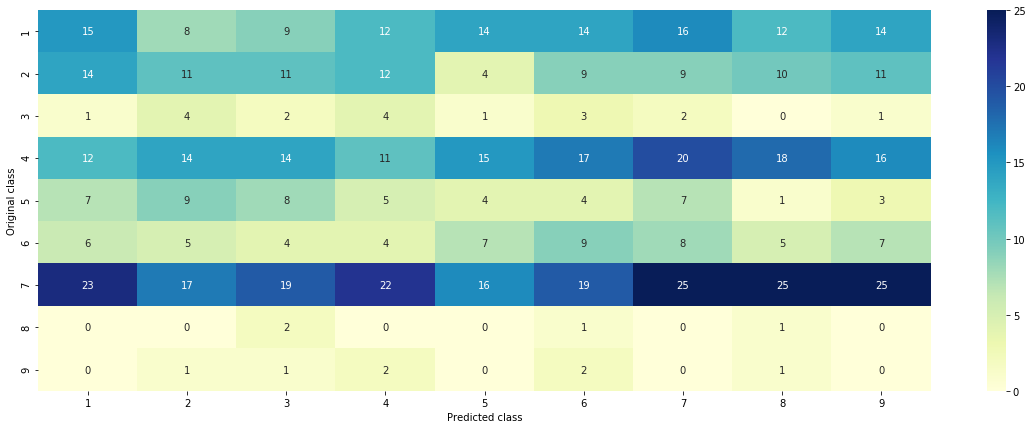

######################### Precision #########################


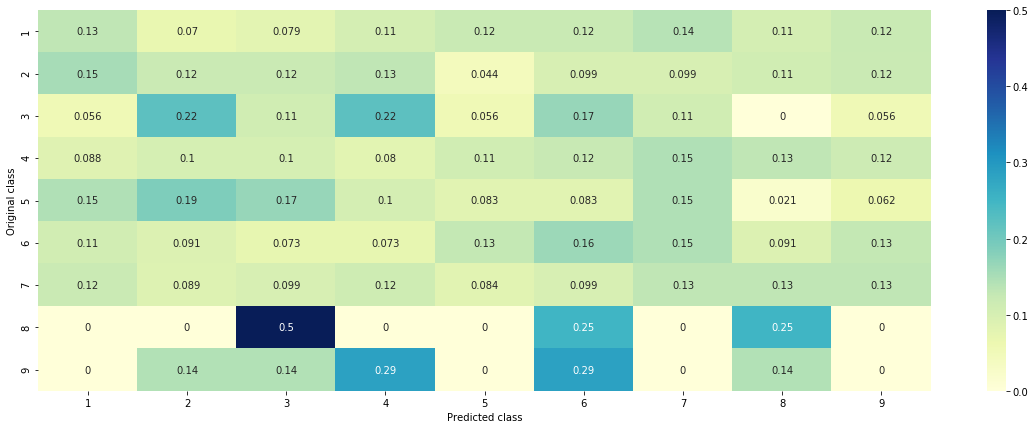

######################### Recall #########################


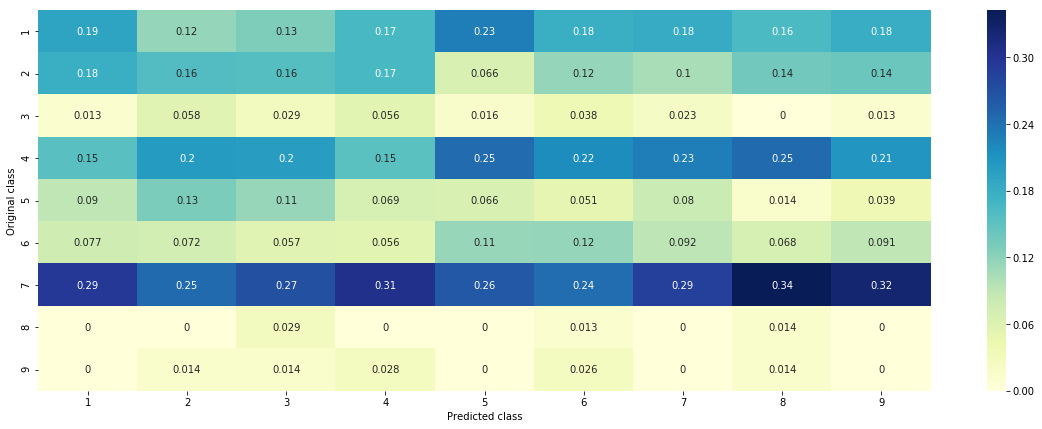

In [352]:
conf_matrix(Test_Y,predicted_y+1)

In [353]:
#Response coding code:
def dict_of_features(feature,alpha,data_frame):
    value_count = D_Train[feature].value_counts()
    dictionary = dict()
    for i,denom in value_count.items():
        vector = list()
        for m in range(1,10):
            c = D_Train.loc[(D_Train['Class']==m) & (D_Train[feature]==i)]
            calc_prob = (c.shape[0] + alpha*10)/ (denom + 90*alpha)
            vector.append(calc_prob)
        dictionary[i] = vector
    return dictionary
def response_coding(feature,alpha,data_frame):
    get_dictionary = dict_of_features(feature,alpha,data_frame)
    value_count = D_Train[feature].value_counts()
    response_coded_feature = list()
    for index,row in data_frame.iterrows():
        if row[feature] in get_dictionary:
            response_coded_feature.append(get_dictionary[row[feature]])
        else:
            response_coded_feature.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,])
    return response_coded_feature
            
    

                                     UNIVARIATE ANALYSIS:


1.GENE FEATURE:
    #categorical variable

In [354]:
unique = D_Train["Gene"].value_counts()
print ("Number of unique genes",unique.shape[0])


Number of unique genes 235


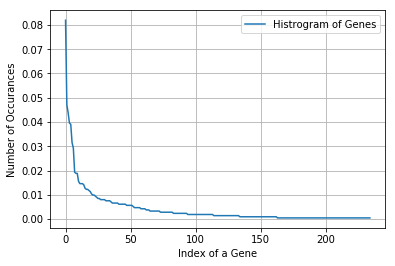

In [355]:
s = sum(unique.values);
h = unique.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()



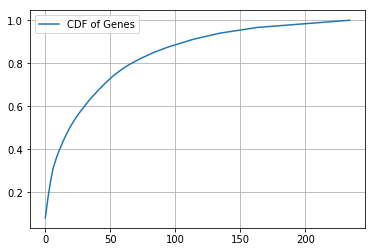

In [356]:
x = np.cumsum(h)
plt.plot(x, label="CDF of Genes")
#plt.xlabel('Index of a Gene')
#plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()


In [357]:
#Now response coding and one hot encoding will be used to feauturize this gene feature!!
#1.Response coding
alpha = 1 #for laplace smoothing!!!!
train_gene_response = response_coding("Gene",alpha,D_Train)
test_gene_response = response_coding("Gene",alpha,Test_dataframe)
crossvalidate_gene_response = response_coding("Gene",alpha,D_Cross_Validate)
#2.one hot encoding!!!
gene_vectorizer = CountVectorizer()
train_gene_feature_onehotCoding = gene_vectorizer.fit_transform(D_Train['Gene'])
test_gene_feature_onehotCoding = gene_vectorizer.transform(Test_dataframe['Gene'])
cv_gene_feature_onehotCoding = gene_vectorizer.transform(D_Cross_Validate['Gene'])

In [358]:
D_Train['Gene'].head()

2003    MAP2K1
2566     BRCA1
69        RHEB
2053       MYC
184       EGFR
Name: Gene, dtype: object

In [359]:
gene_vectorizer.get_feature_names()

['abl1',
 'ago2',
 'akt1',
 'akt2',
 'akt3',
 'alk',
 'apc',
 'ar',
 'araf',
 'arid1a',
 'arid1b',
 'arid2',
 'atm',
 'atr',
 'atrx',
 'aurka',
 'aurkb',
 'axl',
 'b2m',
 'bap1',
 'bard1',
 'bcl10',
 'bcl2',
 'bcl2l11',
 'bcor',
 'braf',
 'brca1',
 'brca2',
 'brd4',
 'brip1',
 'card11',
 'carm1',
 'casp8',
 'cbl',
 'ccnd1',
 'ccnd3',
 'ccne1',
 'cdh1',
 'cdk12',
 'cdk6',
 'cdk8',
 'cdkn1a',
 'cdkn1b',
 'cdkn2a',
 'cdkn2b',
 'chek2',
 'cic',
 'crebbp',
 'ctcf',
 'ctla4',
 'ctnnb1',
 'ddr2',
 'dicer1',
 'dnmt3a',
 'dnmt3b',
 'dusp4',
 'egfr',
 'eif1ax',
 'elf3',
 'ep300',
 'epas1',
 'erbb2',
 'erbb3',
 'erbb4',
 'ercc2',
 'ercc3',
 'ercc4',
 'erg',
 'errfi1',
 'esr1',
 'etv1',
 'etv6',
 'ewsr1',
 'ezh2',
 'fam58a',
 'fanca',
 'fat1',
 'fbxw7',
 'fgf3',
 'fgf4',
 'fgfr1',
 'fgfr2',
 'fgfr3',
 'fgfr4',
 'flt1',
 'flt3',
 'foxa1',
 'foxl2',
 'foxo1',
 'foxp1',
 'fubp1',
 'gata3',
 'gna11',
 'gnaq',
 'gnas',
 'h3f3a',
 'hla',
 'hnf1a',
 'hras',
 'idh1',
 'idh2',
 'igf1r',
 'ikbke',
 'ikzf1',

Determining how good this Gene feature by using Logistic Regression by proving data which contains only Gene as its feature!!!!

For values of alpha =  1e-05 The log loss is: 1.37038231967
For values of alpha =  0.0001 The log loss is: 1.20431075447
For values of alpha =  0.001 The log loss is: 1.21962533115
For values of alpha =  0.01 The log loss is: 1.3361027872
For values of alpha =  0.1 The log loss is: 1.45869341242
For values of alpha =  1 The log loss is: 1.49538919986


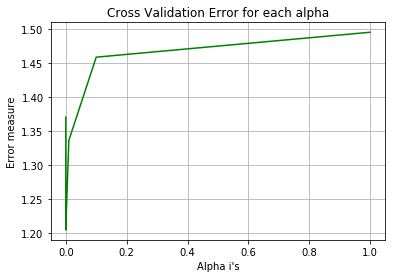

For values of alpha =  0.0001 The log loss on training data: 1.03866189905
For values of alpha =  0.0001 The log loss on cross valiadte data: 1.20431075447
For values of alpha =  0.0001 The log loss on test data: 1.22215519855


In [360]:
alpha = [10 ** x for x in range(-5, 1)] 
cross_validate_logLoss = []
for i in alpha:
    classifier = SGDClassifier(loss = 'log',alpha = i,random_state= 42)
    classifier.fit(train_gene_feature_onehotCoding,D_Train_Y)
    sig_clf = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_clf.fit(train_gene_feature_onehotCoding, D_Train_Y)
    #Calibrated Classifier is used because one of the KPI is log-loss which requires prob
    predict = sig_clf.predict_proba(cv_gene_feature_onehotCoding)
    cross_validate_logLoss.append(log_loss(D_Cross_Validate_Y,predict,labels=classifier.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(D_Cross_Validate_Y, predict,labels=classifier.classes_, eps=1e-15))
fig,axs = plt.subplots()
axs.plot(alpha,cross_validate_logLoss,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cross_validate_logLoss)
classifier = SGDClassifier(loss = 'log',alpha = alpha[best_alpha],random_state=42)
classifier.fit(train_gene_feature_onehotCoding,D_Train_Y)
sig_clf = CalibratedClassifierCV(classifier)
sig_clf.fit(train_gene_feature_onehotCoding,D_Train_Y,)
predict1 = sig_clf.predict_proba(train_gene_feature_onehotCoding)

predict2 =  sig_clf.predict_proba(test_gene_feature_onehotCoding)
predict3 =  sig_clf.predict_proba(cv_gene_feature_onehotCoding)
print('For values of alpha = ', alpha[best_alpha], "The log loss on training data:",log_loss(D_Train_Y, predict1,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on cross valiadte data:",log_loss(D_Cross_Validate_Y, predict3,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on test data:",log_loss(Test_Y, predict2,labels=classifier.classes_, eps=1e-15))
    


In [361]:
#since difference in cross validate and test error  with train error is small hence Gene feature is stable 
#across all dataset!!!!!!!!!

                             UNIVARIATE ANALYSIS ON VARIATION FEATURE!!!!!

Categorical feature

In [362]:
unique = D_Train["Variation"].value_counts()
print ("Number of unique variation",unique.shape[0])

Number of unique variation 1928


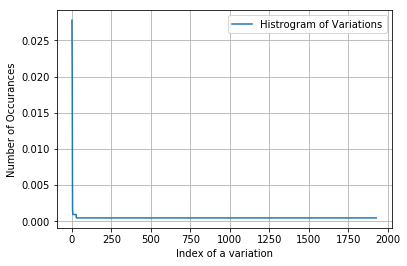

In [363]:
s = np.sum(unique.values)
h = unique.values/s
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

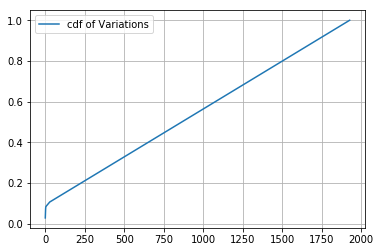

In [364]:
c = np.cumsum(h)
plt.plot(c, label="cdf of Variations")
#plt.xlabel('Index of a variation')
#plt.ylabel('Nu')
plt.legend()
plt.grid()
plt.show()


#To featurize this feature :1.one hot encoding and response coding will be used!!!

In [365]:
#1.Response coding
alpha = 1 #for laplace smoothing!!!!
train_variation_response = response_coding("Variation",alpha,D_Train)
test_variation_response = response_coding("Variation",alpha,Test_dataframe)
crossvalidate_variation_response = response_coding("Variation",alpha,D_Cross_Validate)
#2.one hot encoding!!!
variation_vectorizer = CountVectorizer()
train_variation_feature_onehotCoding = variation_vectorizer.fit_transform(D_Train['Variation'])
test_variation_feature_onehotCoding = variation_vectorizer.transform(Test_dataframe['Variation'])
cv_variation_feature_onehotCoding = variation_vectorizer.transform(D_Cross_Validate['Variation'])

Determining how good this Variation feature by using Logistic Regression by proving data which contains only Gene as its feature!!!!

For values of alpha =  1e-05 The log loss is: 1.72959817259
For values of alpha =  0.0001 The log loss is: 1.71350922141
For values of alpha =  0.001 The log loss is: 1.71027651748
For values of alpha =  0.01 The log loss is: 1.71282156407
For values of alpha =  0.1 The log loss is: 1.7215824601
For values of alpha =  1 The log loss is: 1.72410800961


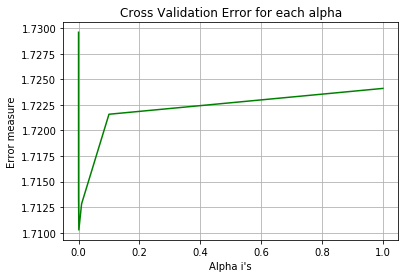

For values of alpha =  0.001 The log loss on training data: 1.05441398869
For values of alpha =  0.001 The log loss on cross valiadte data: 1.71027651748
For values of alpha =  0.001 The log loss on test data: 1.7255280296


In [366]:
alpha = [10 ** x for x in range(-5, 1)] 
cross_validate_logLoss = []
for i in alpha:
    classifier = SGDClassifier(loss = 'log',alpha = i,random_state= 42)
    classifier.fit(train_variation_feature_onehotCoding,D_Train_Y)
    sig_clf = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_clf.fit(train_variation_feature_onehotCoding, D_Train_Y)
    #Calibrated Classifier is used because one of the KPI is log-loss which requires prob
    predict = sig_clf.predict_proba(cv_variation_feature_onehotCoding)
    cross_validate_logLoss.append(log_loss(D_Cross_Validate_Y,predict,labels=classifier.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(D_Cross_Validate_Y, predict,labels=classifier.classes_, eps=1e-15))
fig,axs = plt.subplots()
axs.plot(alpha,cross_validate_logLoss,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cross_validate_logLoss)
classifier = SGDClassifier(loss = 'log',alpha = alpha[best_alpha],random_state=42)
classifier.fit(train_variation_feature_onehotCoding,D_Train_Y)
sig_clf = CalibratedClassifierCV(classifier)
sig_clf.fit(train_variation_feature_onehotCoding,D_Train_Y,)
predict1 = sig_clf.predict_proba(train_variation_feature_onehotCoding)

predict2 =  sig_clf.predict_proba(test_variation_feature_onehotCoding)
predict3 =  sig_clf.predict_proba(cv_variation_feature_onehotCoding)
print('For values of alpha = ', alpha[best_alpha], "The log loss on training data:",log_loss(D_Train_Y, predict1,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on cross valiadte data:",log_loss(D_Cross_Validate_Y, predict3,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on test data:",log_loss(Test_Y, predict2,labels=classifier.classes_, eps=1e-15))
    



In [367]:
#since difference in cross validate and test error  with train error is large hence Variation feature is not stable 
#across all dataset!!!!!!!!!

                            UNIVARIATE ANALYSIS ON TEXT FEATURE

In [368]:
list_of_dictionary = list()
for i in range(1,10):
    sub_df = D_Train[D_Train["Class"] == i]
    list_of_dictionary.append(generate_dic(sub_df))

dict_words_Train = generate_dic(D_Train)


    
    

In [369]:
def generate_dic(df):
    new_dict = dict()
    for i,rows in df.iterrows():
        for j in rows["TEXT"].split():
            
            if j not in new_dict:
                new_dict[j] = 1
            else:
                new_dict[j] = new_dict[j]+1
    return new_dict
            

In [370]:
def response_code(df):
    arr =  np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_no = 0
        for j,rows in df.iterrows():
            probability = 0
            #print (rows["TEXT"].split())
            for word in rows["TEXT"].split():
                probability += log((list_of_dictionary[i].get(word,0)+10)/(dict_words_Train.get(word,0)+90))
           
            arr[row_no][i] = exp(probability/len(rows["TEXT"].split()))
            row_no += 1
    return arr
            
                
        
        

In [371]:
text_vectorizer = CountVectorizer(min_df=3)
one_hot_encoding_train_text = text_vectorizer.fit_transform(D_Train["TEXT"])
train_text_feature = text_vectorizer.get_feature_names()
print ("Total no. of unique words in Train data",len(train_text_feature))


Total no. of unique words in Train data 52495


In [372]:
#response coding of text feature!!!
text_train_feature = response_code(D_Train)
text_test_feature = response_code(Test_dataframe)
text_cv_feature = response_code(D_Cross_Validate)

In [373]:
one_hot_encoding_train_text = normalize(one_hot_encoding_train_text,axis = 0)
one_hot_encoding_test_text = normalize(text_vectorizer.transform(Test_dataframe["TEXT"]),axis = 0)
one_hot_encoding_cv_text = normalize(text_vectorizer.transform(D_Cross_Validate["TEXT"]),axis = 0)

Determining how good this TEXT feature by using Logistic Regression by proving data which contains only TEXT as its feature!!!!

For values of alpha =  1e-05 The log loss is: 1.33103950744
For values of alpha =  0.0001 The log loss is: 1.30373381812
For values of alpha =  0.001 The log loss is: 1.13279888206
For values of alpha =  0.01 The log loss is: 1.21643252886
For values of alpha =  0.1 The log loss is: 1.43589366694
For values of alpha =  1 The log loss is: 1.64779106086


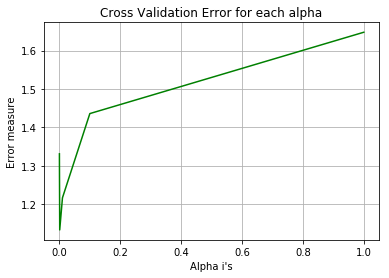

For values of alpha =  0.001 The log loss on training data: 0.74726504512
For values of alpha =  0.001 The log loss on cross valiadte data: 1.13279888206
For values of alpha =  0.001 The log loss on test data: 1.20575693869


In [374]:
alpha = [10 ** x for x in range(-5, 1)] 
cross_validate_logLoss = []
for i in alpha:
    classifier = SGDClassifier(loss = 'log',alpha = i,random_state= 42)
    classifier.fit(one_hot_encoding_train_text,D_Train_Y)
    sig_clf = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_clf.fit(one_hot_encoding_train_text, D_Train_Y)
    #Calibrated Classifier is used because one of the KPI is log-loss which requires prob
    predict = sig_clf.predict_proba(one_hot_encoding_cv_text)
    cross_validate_logLoss.append(log_loss(D_Cross_Validate_Y,predict,labels=classifier.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(D_Cross_Validate_Y, predict,labels=classifier.classes_, eps=1e-15))
fig,axs = plt.subplots()
axs.plot(alpha,cross_validate_logLoss,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cross_validate_logLoss)
classifier = SGDClassifier(loss = 'log',alpha = alpha[best_alpha],random_state=42)
classifier.fit(one_hot_encoding_train_text,D_Train_Y)
sig_clf = CalibratedClassifierCV(classifier)
sig_clf.fit(one_hot_encoding_train_text,D_Train_Y,)
predict1 = sig_clf.predict_proba(one_hot_encoding_train_text)

predict2 =  sig_clf.predict_proba(one_hot_encoding_test_text)
predict3 =  sig_clf.predict_proba(one_hot_encoding_cv_text)
print('For values of alpha = ', alpha[best_alpha], "The log loss on training data:",log_loss(D_Train_Y, predict1,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on cross valiadte data:",log_loss(D_Cross_Validate_Y, predict3,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on test data:",log_loss(Test_Y, predict2,labels=classifier.classes_, eps=1e-15))
    




In [375]:
#minimum log loss we are getting is with TEXT feature hence it can be concluded that text is the most imp feature
#followed by GENE feature and then Variation feature!!


                                STACKING ALL THE FEATURES!!!

In [376]:
train_gene_var_fea_one_hot = hstack((train_gene_feature_onehotCoding,train_variation_feature_onehotCoding))
test_gene_var_fea_one_hot = hstack((test_gene_feature_onehotCoding,test_variation_feature_onehotCoding))
cv_gene_var_fea_one_hot = hstack((cv_gene_feature_onehotCoding,cv_variation_feature_onehotCoding))

train_gene_var_fea_response_code = np.hstack((train_gene_response,train_variation_response))
test_gene_var_fea_response_code = np.hstack((test_gene_response,test_variation_response))
cv_gene_var_fea_response_code = np.hstack((crossvalidate_gene_response,crossvalidate_variation_response))



In [377]:
Train_X_one_hot = hstack((train_gene_var_fea_one_hot,one_hot_encoding_train_text)).tocsr()
Train_Y_one_hot = np.array(list(D_Train["Class"]))
Test_X_one_hot = hstack((test_gene_var_fea_one_hot,one_hot_encoding_test_text)).tocsr()
Test_Y_one_hot = np.array(list(Test_dataframe["Class"]))
CV_X_one_hot =  hstack((cv_gene_var_fea_one_hot,one_hot_encoding_cv_text)).tocsr()
CV_Y_one_hot = np.array(list(D_Cross_Validate["Class"]))


Train_X_respond = np.hstack((train_gene_var_fea_response_code,text_train_feature))
Test_X_respond = np.hstack((test_gene_var_fea_response_code,text_test_feature))
CV_X_respond = np.hstack((cv_gene_var_fea_response_code,text_cv_feature))





In [378]:
print("One hot encoding features :")
print("(number of data points * number of features) in train data = ", Train_X_one_hot.shape)
print("(number of data points * number of features) in test data = ", Test_X_one_hot.shape)
print("(number of data points * number of features) in cross validation data =", CV_X_one_hot.shape)

One hot encoding features :
(number of data points * number of features) in train data =  (2124, 54687)
(number of data points * number of features) in test data =  (665, 54687)
(number of data points * number of features) in cross validation data = (532, 54687)


In [379]:
print("respond coding features :")
print("(number of data points * number of features) in train data = ", Train_X_respond.shape)
print("(number of data points * number of features) in test data = ", Test_X_respond.shape)
print("(number of data points * number of features) in cross validation data =", CV_X_respond.shape)

respond coding features :
(number of data points * number of features) in train data =  (2124, 27)
(number of data points * number of features) in test data =  (665, 27)
(number of data points * number of features) in cross validation data = (532, 27)


                                         NAIVE BAYES

For values of alpha =  1e-05 The log loss is: 1.23678962779
For values of alpha =  0.0001 The log loss is: 1.23882310987
For values of alpha =  0.001 The log loss is: 1.24649219846
For values of alpha =  0.01 The log loss is: 1.25607907077
For values of alpha =  0.1 The log loss is: 1.26083597777
For values of alpha =  1 The log loss is: 1.26602162932
For values of alpha =  10 The log loss is: 1.3936968323
For values of alpha =  100 The log loss is: 1.35943208975
For values of alpha =  1000 The log loss is: 1.2918956143


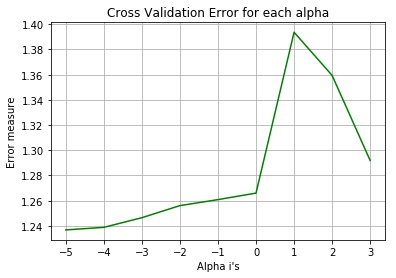

For values of alpha =  1e-05 The log loss on training data: 0.82080459316
For values of alpha =  1e-05 The log loss on cross valiadte data: 1.23678962779
For values of alpha =  1e-05 The log loss on test data: 1.28707000987


In [380]:
alpha = [10 ** x for x in range(-5, 4)] 
cross_validate_logLoss = []
for i in alpha:
    classifier = MultinomialNB(alpha = i)
    classifier.fit(Train_X_one_hot,D_Train_Y)
    sig_clf = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_clf.fit(Train_X_one_hot, D_Train_Y)
    #Calibrated Classifier is used because one of the KPI is log-loss which requires prob
    predict = sig_clf.predict_proba(CV_X_one_hot)
    cross_validate_logLoss.append(log_loss(D_Cross_Validate_Y,predict,labels=classifier.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(D_Cross_Validate_Y, predict,labels=classifier.classes_, eps=1e-15))
fig,axs = plt.subplots()
axs.plot(np.log10(alpha),cross_validate_logLoss,c='g')
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cross_validate_logLoss)
classifier = MultinomialNB(alpha = alpha[best_alpha])
classifier.fit(Train_X_one_hot,D_Train_Y)
sig_clf = CalibratedClassifierCV(classifier)
sig_clf.fit(Train_X_one_hot,D_Train_Y,)
predict1 = sig_clf.predict_proba(Train_X_one_hot)

predict2 =  sig_clf.predict_proba(Test_X_one_hot)
predict3 =  sig_clf.predict_proba(CV_X_one_hot)
print('For values of alpha = ', alpha[best_alpha], "The log loss on training data:",log_loss(D_Train_Y, predict1,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on cross valiadte data:",log_loss(D_Cross_Validate_Y, predict3,labels=classifier.classes_, eps=1e-15))
print('For values of alpha = ', alpha[best_alpha], "The log loss on test data:",log_loss(Test_Y, predict2,labels=classifier.classes_, eps=1e-15))
    





                       Let's test the model with best hyper-parameter

Log Loss:: 1.23678962779
Misclassified points: 0.39097744360902253
######################### Confusion_Matrix #########################


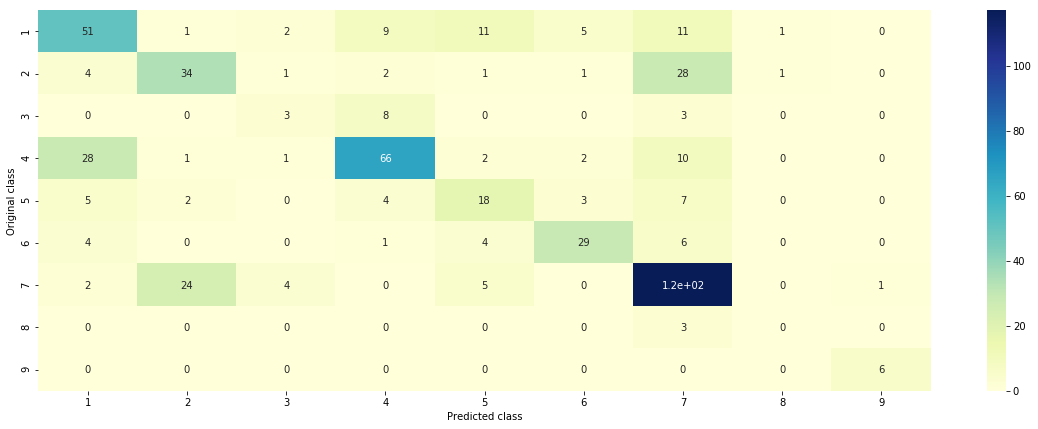

######################### Precision #########################


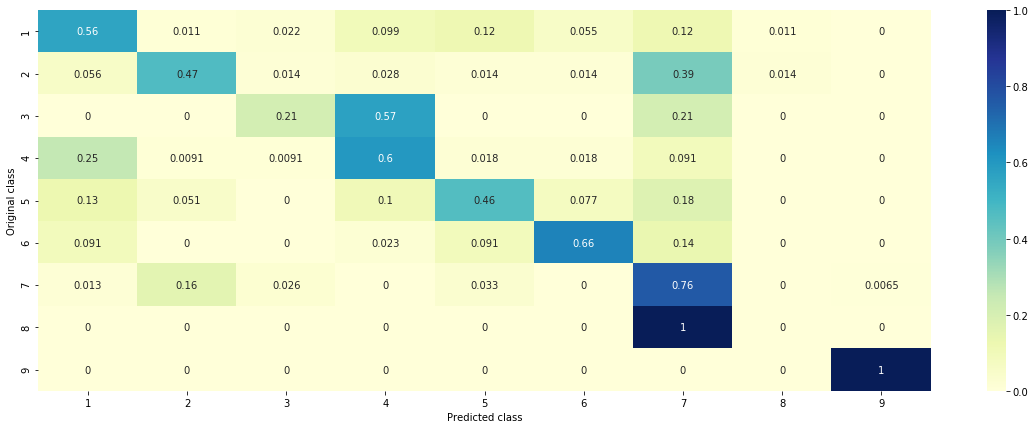

######################### Recall #########################


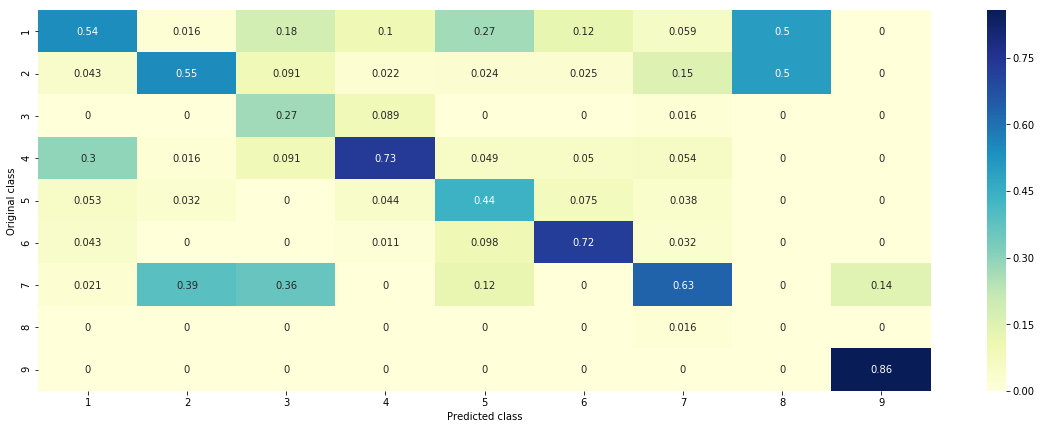

In [381]:
classifier = MultinomialNB(alpha = alpha[best_alpha])
classifier.fit(Train_X_one_hot,D_Train_Y)
sig_clf = CalibratedClassifierCV(classifier)
sig_clf.fit(Train_X_one_hot,D_Train_Y)
predict = sig_clf.predict_proba(CV_X_one_hot)
print ("Log Loss::",log_loss(D_Cross_Validate_Y,predict))
print ("Misclassified points:",np.count_nonzero((sig_clf.predict(CV_X_one_hot)-D_Cross_Validate_Y))/CV_X_one_hot.shape[0])

conf_matrix(D_Cross_Validate_Y,sig_clf.predict(CV_X_one_hot))

In [403]:

def get_impfeature_names(indices, text, gene, var, no_features):
    gene_count_vec = CountVectorizer()
    var_count_vec = CountVectorizer()
    text_count_vec = CountVectorizer(min_df=3)
    
    gene_vec = gene_count_vec.fit(D_Train['Gene'])
    var_vec  = var_count_vec.fit(D_Train['Variation'])
    text_vec = text_count_vec.fit(D_Train['TEXT'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_count_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

In [406]:
print ("Feature importance of misclassified point")
test_point = 2
no_feature = 200
predicted_class = sig_clf.predict(Test_X_one_hot[test_point])
print("Predicted Class",predicted_class[0])
print ("Predicted class prob",np.round(sig_clf.predict_proba(Test_X_one_hot[test_point]),4))
print ("Actual Class",Test_Y_one_hot[test_point])
indices = np.argsort(-classifier.coef_)[predicted_class-1][:,:no_feature]
get_impfeature_names(indices[0], Test_dataframe['TEXT'].iloc[test_point],Test_dataframe['Gene'].iloc[test_point],Test_dataframe['Variation'].iloc[test_point], no_feature)
print (("*")*100)

Feature importance of misclassified point
Predicted Class 2
Predicted class prob [[ 0.0975  0.3763  0.0131  0.1174  0.0416  0.0414  0.3029  0.0051  0.0046]]
Actual Class 7
20 Text feature [identified] present in test data point [True]
21 Text feature [molecular] present in test data point [True]
22 Text feature [confirmed] present in test data point [True]
23 Text feature [found] present in test data point [True]
24 Text feature [different] present in test data point [True]
25 Text feature [using] present in test data point [True]
26 Text feature [sequencing] present in test data point [True]
28 Text feature [novel] present in test data point [True]
29 Text feature [revealed] present in test data point [True]
30 Text feature [another] present in test data point [True]
32 Text feature [new] present in test data point [True]
33 Text feature [present] present in test data point [True]
34 Text feature [15] present in test data point [True]
35 Text feature [may] present in test data point [

In [409]:
print ("Feature importance of  correctly classified point")
test_point = 5
no_feature = 200
predicted_class = sig_clf.predict(Test_X_one_hot[test_point])
print("Predicted Class",predicted_class[0])
print ("Predicted class prob",np.round(sig_clf.predict_proba(Test_X_one_hot[test_point]),4))
print ("Actual Class",Test_Y_one_hot[test_point])
indices = np.argsort(-classifier.coef_)[predicted_class-1][:,:no_feature]
get_impfeature_names(indices[0], Test_dataframe['TEXT'].iloc[test_point],Test_dataframe['Gene'].iloc[test_point],Test_dataframe['Variation'].iloc[test_point], no_feature)
print (("*")*100)

Feature importance of  correctly classified point
Predicted Class 7
Predicted class prob [[ 0.091   0.0873  0.0119  0.1092  0.0383  0.0385  0.6146  0.0049  0.0043]]
Actual Class 7
16 Text feature [kinase] present in test data point [True]
17 Text feature [presence] present in test data point [True]
22 Text feature [inhibitor] present in test data point [True]
23 Text feature [independent] present in test data point [True]
25 Text feature [treated] present in test data point [True]
26 Text feature [well] present in test data point [True]
27 Text feature [compared] present in test data point [True]
29 Text feature [contrast] present in test data point [True]
30 Text feature [found] present in test data point [True]
31 Text feature [cell] present in test data point [True]
32 Text feature [recently] present in test data point [True]
33 Text feature [showed] present in test data point [True]
34 Text feature [previously] present in test data point [True]
35 Text feature [cells] present in te